# Análisis del catálogo Hipparcos: Preprocesamiento de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils.funciones import *
from fast_ml import eda
import matplotlib.pyplot as plt
import pickle

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/hipparcos.csv')

In [3]:
df

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,AstroRef,Plx,pmRA,pmDE,e_RAdeg,e_DEdeg,e_Plx,e_pmRA,e_pmDE,DE:RA,Plx:RA,Plx:DE,pmRA:RA,pmRA:DE,pmRA:Plx,pmDE:RA,pmDE:DE,pmDE:Plx,pmDE:pmRA,F1,F2,---,BTmag,e_BTmag,VTmag,e_VTmag,m_BTmag,B-V,e_B-V,r_B-V,V-I,e_V-I,r_V-I,CombMag,Hpmag,e_Hpmag,Hpscat,o_Hpmag,m_Hpmag,Hpmax,HPmin,Period,HvarType,moreVar,morePhoto,CCDM,n_CCDM,Nsys,Ncomp,MultFlag,Source,Qual,m_HIP,theta,rho,e_rho,dHp,e_dHp,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,NaN,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81,0.32,-0.07,-0.11,-0.24,0.09,-0.01,0.10,-0.01,0.01,0.34,0.0,0.74,1,9.643,0.020,9.130,0.019,NaN,0.482,0.025,T,0.55,0.03,L,NaN,9.2043,0.0020,0.017,87.0,NaN,9.17,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,+,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.12,-0.14,-0.24,-0.29,0.01,0.21,-0.02,-0.19,-0.28,0.14,2.0,1.45,2,10.519,0.033,9.378,0.021,NaN,0.999,0.002,G,1.04,0.00,I,NaN,9.4017,0.0017,0.015,120.0,NaN,9.37,9.44,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,NaN,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.06,0.09,0.04,0.43,-0.01,-0.06,0.03,0.24,0.07,0.21,0.0,-0.45,3,6.576,0.004,6.621,0.005,NaN,-0.019,0.004,G,0.00,0.00,H,NaN,6.6081,0.0007,0.008,127.0,NaN,6.60,6.62,NaN,C,NaN,NaN,00000+3852,I,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,NaN,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,-0.22,-0.09,-0.03,0.24,0.20,0.08,0.18,0.08,-0.31,-0.18,0.0,-1.46,4,8.471,0.007,8.092,0.007,NaN,0.370,0.009,T,0.43,0.01,L,NaN,8.1498,0.0011,0.015,201.0,NaN,8.12,8.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,NaN,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.10,0.24,0.06,0.26,-0.10,0.20,-0.16,-0.30,-0.19,0.06,0.0,-1.24,5,9.693,0.014,8.656,0.010,NaN,0.902,0.013,T,0.90,0.01,L,NaN,8.7077,0.0018,0.019,161.0,NaN,8.68,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118213,H,118318,NaN,23 59 51.30,+11 40 25.4,6.99,1.0,H,359.963744,11.673709,NaN,1.92,-2.16,2.09,0.78,0.50,0.91,0.88,0.60,0.33,-0.02,-0.09,-0.19,-0.03,0.21,-0.02,-0.11,0.27,0.49,0.0,2.00,118318,9.107,0.015,7.186,0.007,NaN,1.595,0.013,T,1.61,0.01,L,NaN,7.1043,0.0018,0.014,92.0,NaN,7.08,7.12,NaN,M,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224673.0,B+10 5018,NaN,NaN,1.56,K2,S
118214,H,118319,NaN,23 59 53.74,-22 25 41.4,8.23,NaN,G,359.973913,-22.428180,NaN,10.63,148.74,27.53,0.97,0.58,1.17,1.10,0.52,0.04,0.17,0.04,-0.11,0.10,0.17,0.07,-0.31,0.12,-0.05,0.0,1.19,118319,9.019,0.013,8.295,0.011,NaN,0.639,0.015,G,0.70,0.01,H,NaN,8.3699,0.0014,0.016,118.0,NaN,8.34,8.39,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224693.0,NaN,C-23 18108,P-23 8366,0.70,G2V,4
118215,H,118320,NaN,23 59 54.25,+05 57 23.9,7.59,NaN,H,359.976057,5.956638,NaN,5.00,20.92,-35.26,0.95,0.53,1.01,0.89,0.54,0.21,0.00,-0.05,-0.18,0.01,-0.04,0.01,-0.14,0.22,0.27,4.0,-1.12,118320,8.868,0.013,7.704,0.009,NaN,0.999,0.012,T,0.98,0.01,L,NaN,7.7604,0.0010,0.010,86.0,NaN,7.74,7.77,NaN,C,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,224689.0,B+05 5245,NaN,NaN,0.98,K0,S


In [4]:
eda.df_info(df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
Catalog,object,Categorical,1,[H],0,0.0
HIP,int64,Numerical,118218,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",0,0.0
Proxy,object,Categorical,2,"[nan, H, T]",107293,90.758599
RAhms,object,Categorical,117384,"[00 00 00.22, 00 00 00.91, 00 00 01.20, 00 00 ...",0,0.0
DEdms,object,Categorical,116926,"[+01 05 20.4, -19 29 55.8, +38 51 33.4, -51 53...",0,0.0
...,...,...,...,...,...,...
CoD,object,Categorical,27880,"[nan, C-41 15372, C-51 13738, C-36 16128, C-23...",90338,76.416451
CPD,object,Categorical,40250,"[nan, P-52 12237, P-41 9991, P-51 12065, P-36...",77968,65.952731
(V-I)red,float64,Numerical,565,"[0.66, 1.04, 0.0, 0.43, 0.95, 1.55, 0.79, 4.82...",0,0.0
SpType,object,Categorical,4124,"[F5, K3V, B9, F0V, G8III, M0V:, G0, M6e-M8.5e ...",3034,2.566445


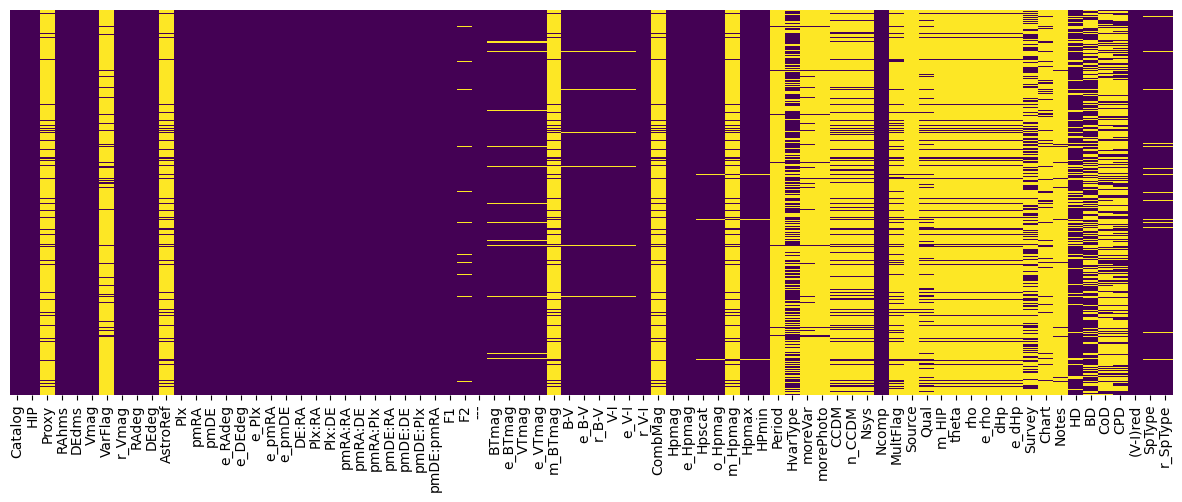

In [5]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Extraemos las columnas `'Period', 'HvarType', 'moreVar', 'morePhoto'` a un nuevo dataframe para utilizarlas en la sección de estrellas variables del notebook principal.

In [6]:
variables = df[['Period', 'HvarType', 'moreVar', 'morePhoto']].copy()
variables.to_parquet('data/variables.parquet')

In [7]:
df.drop(['Proxy', 'VarFlag', 'AstroRef', 'm_BTmag', 'CombMag', 'm_Hpmag', 'CCDM', 'n_CCDM', 'Nsys', 'MultFlag', 'Source', 'Source', 'Qual', 'm_HIP', 'theta', 'rho',
       'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'BD', 'CoD','CPD', 'Period', 'HvarType', 'moreVar', 'morePhoto'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Catalog', 'HIP', 'RAhms', 'DEdms', 'Vmag', 'r_Vmag', 'RAdeg', 'DEdeg',
       'Plx', 'pmRA', 'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA',
       'e_pmDE', 'DE:RA', 'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx',
       'pmDE:RA', 'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---',
       'BTmag', 'e_BTmag', 'VTmag', 'e_VTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I',
       'e_V-I', 'r_V-I', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'Hpmax',
       'HPmin', 'Ncomp', 'HD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

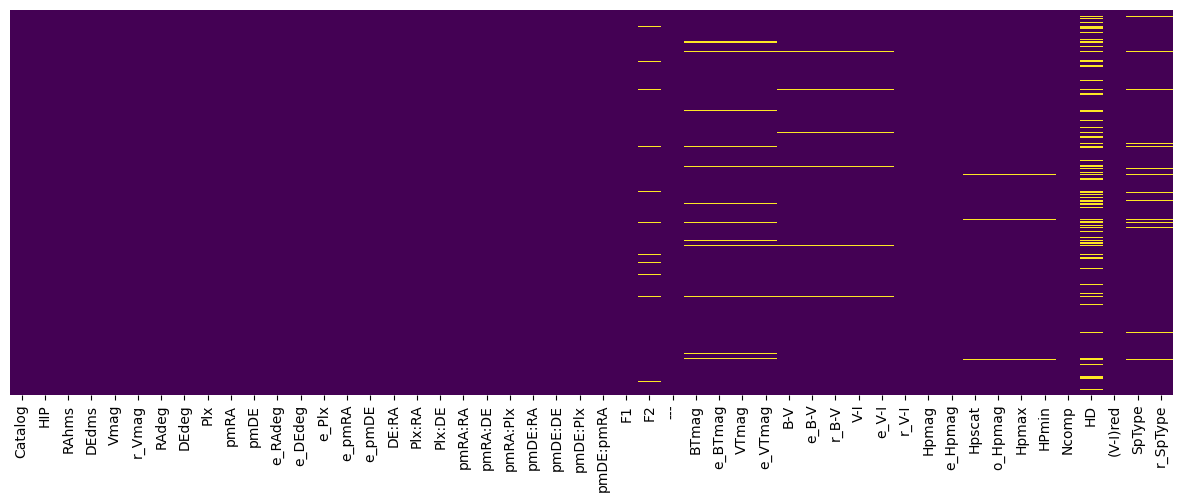

In [9]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [10]:
papas_perdidas(df)

,Missing Values,Percentage
Catalog,0,0.000000
HIP,0,0.000000
RAhms,0,0.000000
DEdms,0,0.000000
Vmag,1,0.000846
r_Vmag,1,0.000846
RAdeg,263,0.222470
DEdeg,263,0.222470
Plx,263,0.222470
pmRA,263,0.222470


## Tratamiento de datos con KNN

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Catalog', 'HIP', 'RAhms', 'DEdms', 'Vmag', 'r_Vmag', 'RAdeg', 'DEdeg',
       'Plx', 'pmRA', 'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA',
       'e_pmDE', 'DE:RA', 'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx',
       'pmDE:RA', 'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---',
       'BTmag', 'e_BTmag', 'VTmag', 'e_VTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I',
       'e_V-I', 'r_V-I', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'Hpmax',
       'HPmin', 'Ncomp', 'HD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

In [13]:
df_encoded, encoded_info = fritas(df)

In [14]:
target_column = 'SpType'
bestkar = bravas(df_encoded, target_column=target_column)

KeyboardInterrupt: 

In [ ]:
bestkar

14

In [ ]:
df_imputed = mojo_picon(df_encoded, bestkar)

In [ ]:
df_imputed.isnull().sum().sum()

0

In [ ]:
hipparcos = des_fritas(df_imputed, encoded_info)

In [ ]:
hipparcos.to_parquet('data/hipparcos.parquet')

In [ ]:
hipparcos.to_csv('data/hipparcos.csv', index=False)